# Graph Neural Network - Node classification task
---

This notebook illustrates how to perform node classification in a graph, using **Graph Neural Networks**.

In [1]:
from IPython.display import SVG
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import karate_club, load_netset
from sknetwork.gnn.gnn_classifier import GNNClassifier
from sknetwork.visualization import svg_graph

## Toy graph

Let's load `karate_club` graph with the corresponding labels for each node.

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
labels = graph.labels
position = graph.position

Since this graph doest not contain any node feature, we define a feature matrix that equals the original adjacency matrix of the graph.  
Then the `GNNClassifier` is initialized with desired dimensions for layers, as well as an optimizer , with:
- `nb_features` the number of features for each node (equivalent to the number of nodes in the graph in our example).
- `hidden_layer` corresponding to the dimension of the hidden layer.
- `output layer` corresponding to the dimension of the output layer. For binary classification, the output layer 
has size 1.
- `opt` corresponds to the name of the optimizer.  

The `fit_transform()` can be used either with:
- `test_size` parameter, which defines the proportion of nodes to include in the test set.
- `train_mask` and `test_mask` parameters, which allows the user to provide the model with pre-defined train/test masks.

In [6]:
# Initialize features
features = adjacency.copy()

# Initialize GNNClassifier
gnn = GNNClassifier(features.shape[1], 8, 1, opt='none', verbose=True)

# Train model
y_pred = gnn.fit_transform(adjacency, features, labels, max_iter=10, test_size=0.2)

In epoch   0, loss: 0.697, training acc: 0.500, test acc: 0.500
In epoch   1, loss: 0.458, training acc: 0.500, test acc: 0.536
In epoch   2, loss: 0.404, training acc: 1.000, test acc: 0.786
In epoch   3, loss: 0.367, training acc: 1.000, test acc: 0.893
In epoch   4, loss: 0.337, training acc: 1.000, test acc: 0.964
In epoch   5, loss: 0.313, training acc: 1.000, test acc: 0.964
In epoch   6, loss: 0.292, training acc: 1.000, test acc: 0.964
In epoch   7, loss: 0.273, training acc: 1.000, test acc: 0.964
In epoch   8, loss: 0.256, training acc: 1.000, test acc: 0.964
In epoch   9, loss: 0.240, training acc: 1.000, test acc: 0.964


The trained model contains history metrics for each training epoch.

In [7]:
gnn.history_.keys()

dict_keys(['embedding', 'loss', 'train_accuracy', 'test_accuracy'])

Using historical information, we can verify that the model has indeed learned over epochs.

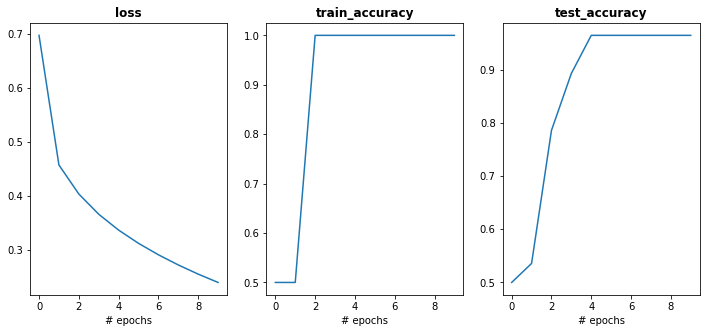

In [8]:
metrics = ['loss', 'train_accuracy', 'test_accuracy']

# Plot results
fig, ax = plt.subplots(1, len(metrics), figsize=(12, 5))
for i, m in enumerate(metrics):
    ax[i].plot(range(len(gnn.history_.get(m))), gnn.history_.get(m))
    ax[i].set_title(m, weight='bold')
    ax[i].set_xlabel('# epochs')

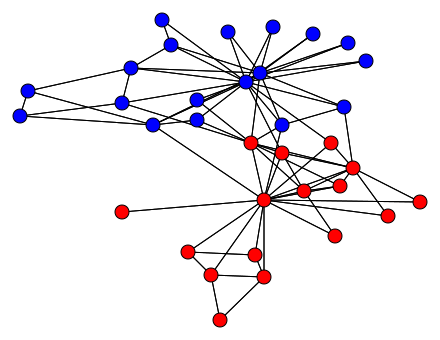

In [9]:
# visualization
image = svg_graph(adjacency, position=position, labels=y_pred)
SVG(image)